In [ ]:
# End to End project on ml (On classification problem)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt

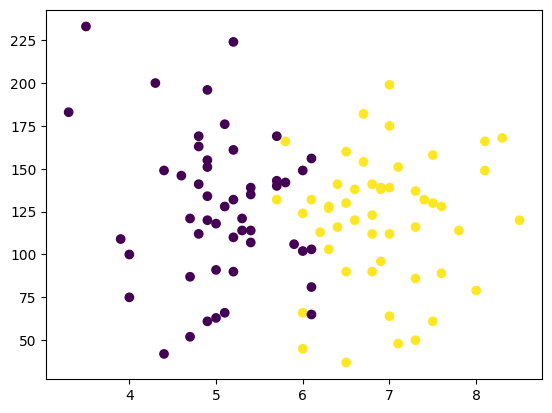

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
x=df.iloc[:,0:2]

In [11]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [12]:
y=df.iloc[:,-1]

In [13]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [14]:
x.shape

(100, 2)

In [15]:
y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)

In [17]:
X_train

,cgpa,iq
84,5.7,169.0
0,6.8,123.0
96,4.4,42.0
9,5.1,66.0
27,6.0,124.0
...,...,...
29,7.0,112.0
71,6.1,132.0
97,6.7,182.0
80,4.9,196.0


In [18]:
Y_train

84    0
0     1
96    0
9     0
27    1
     ..
29    1
71    1
97    1
80    0
56    0
Name: placement, Length: 90, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_train

array([[-2.16301281e-01,  1.11474253e+00],
       [ 7.61499031e-01, -2.69326536e-04],
       [-1.37188347e+00, -1.96365978e+00],
       [-7.49646906e-01, -1.38191446e+00],
       [ 5.03715312e-02,  2.39700617e-02],
       [ 4.05935281e-01, -1.69945044e-01],
       [-1.27410344e-01,  4.60279051e-01],
       [ 1.02817184e+00, -1.81822345e+00],
       [ 1.39262469e-01, -1.01832363e+00],
       [-6.60755968e-01,  9.20827428e-01],
       [-1.01631972e+00,  1.11474253e+00],
       [ 4.94826218e-01,  8.96588040e-01],
       [-7.49646906e-01,  1.20927615e-01],
       [-1.72744722e+00, -1.16375996e+00],
       [-4.82974093e-01,  2.90603333e-01],
       [-8.38537843e-01, -7.75929751e-01],
       [ 6.72608093e-01,  7.51151710e-01],
       [ 9.39280905e-01,  1.84192418e+00],
       [-8.38537843e-01, -1.45463262e+00],
       [ 8.50389968e-01,  3.63321498e-01],
       [ 7.61499031e-01, -8.00169140e-01],
       [-6.60755968e-01, -8.00169140e-01],
       [-2.17190190e+00,  2.66606338e+00],
       [-9.

In [23]:
X_test=scaler.transform(X_test)

In [24]:
X_test

array([[ 2.27264497, -0.07298749],
       [ 0.31704434, -0.48505709],
       [ 0.31704434,  0.09668823],
       [ 1.29484466,  0.21788517],
       [ 1.20595372, -0.16994504],
       [-0.48297409,  0.38756089],
       [ 0.49482622, -0.80016914],
       [-1.01631972,  0.9693062 ],
       [-1.19410159,  0.5572366 ],
       [ 1.02817184,  0.67843355]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf=LogisticRegression()

In [27]:
#model training
clf.fit(X_train,Y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [28]:
Y_pred=clf.predict(X_test)  #prediction by model

In [29]:
Y_test    #given prediction in output col.

69    1
98    1
70    1
3     1
72    1
12    0
79    1
34    0
39    0
21    1
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test,Y_pred)

1.0

In [36]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

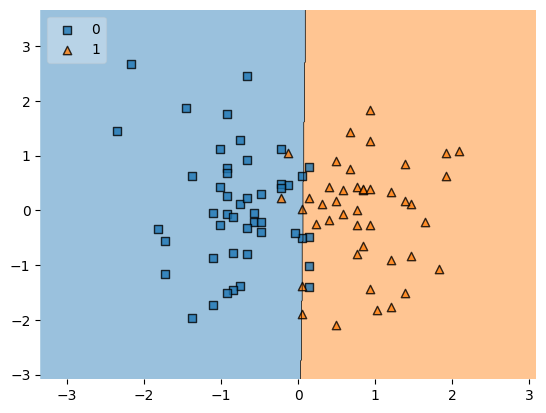

In [37]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [38]:
import pickle

In [40]:
pickle.dump(clf,open('model.pkl','wb'))